# Basic

In [1]:
from langgraph.graph import Graph

In [5]:
def function_1(input_1):
    return input_1 + " Hi "

def function_2(input_2):
    return input_2 + "there"

# Define a Langchain graph
workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('node_1', 'node_2')

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [6]:
app.invoke("Hello")

'Hello Hi there'

In [7]:
list(app.stream('Hello'))


[{'node_1': 'Hello Hi '}, {'node_2': 'Hello Hi there'}]

In [5]:
input = 'Hello'
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'node_1':
---
Hello Hi 

---

Output from node 'node_2':
---
Hello Hi there

---



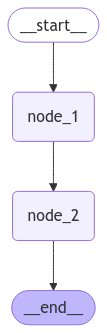

In [8]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

# Add Ollama

In [9]:
from langchain_ollama.llms import OllamaLLM

model = OllamaLLM(model="llama3.2", temperature=0.3)

In [10]:
model.invoke("how about today?")

'I\'m not aware of the current date or time. I\'m a large language model, I don\'t have real-time access to the current day or time. However, I can suggest ways for you to find out the current date and time.\n\nYou can check your device\'s clock or calendar app, or search online for "current date and time" to get the latest information.'

In [11]:
def function_1(input_1):
    response = model.invoke(input_1)
    return response

def function_2(input_2):
    return "Agent Says: " + input_2

# Define a Langchain graph
workflow = Graph()

#calling node 1 as agent
workflow.add_node("agent", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('agent', 'node_2')

workflow.set_entry_point("agent")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [12]:
app.invoke("what is the shape of the earth?")

"Agent Says: The Earth's shape is a topic of ongoing debate and research in the field of geophysics. While there are different theories, the most widely accepted model is that the Earth is an oblate spheroid.\n\nAn oblate spheroid is a three-dimensional shape that is slightly flattened at the poles and bulging at the equator. This means that the Earth is roughly spherical in shape but not perfectly round. The equatorial radius of the Earth is about 6,378 kilometers (3,959 miles), while the polar radius is about 6,357 kilometers (3,949 miles).\n\nThe oblate spheroid model is supported by a variety of evidence, including:\n\n1. Satellite imagery: Images taken from space show that the Earth's shape is not perfectly round.\n2. Gravity measurements: Scientists have measured the strength of gravity at different latitudes and found that it varies slightly depending on the location.\n3. Seismic data: Seismologists have studied the way seismic waves travel through the Earth and found that they 

In [13]:
input = 'what is the shape of the earth?'
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
The Earth's shape is a topic of ongoing debate and research in the fields of geology, astronomy, and physics. While there is no consensus on a single answer, here are some facts about the Earth's shape:

1. **Approximate sphere**: The most widely accepted model of the Earth is an oblate spheroid, meaning it is roughly spherical but slightly flattened at the poles and bulging at the equator.
2. **Equatorial radius**: The Earth's equatorial radius is approximately 6,378 kilometers (3,959 miles).
3. **Polar radius**: The Earth's polar radius is approximately 6,357 kilometers (3,949 miles), which is about 21 kilometers (13 miles) shorter than the equatorial radius.
4. **Shape variations**: The Earth's shape can vary slightly due to factors such as:
 * **Tidal forces**: The gravitational pull of the Moon and Sun causes the Earth's oceans to bulge out in two areas, creating a slight flattening at the poles.
 * **Geological processes**: The movement of tectonic p

# Ask for temperature

In [14]:
def function_1(input_1):
    complete_query = "Your task is to provide only the city name based on the user query. \
        Nothing more, just the city name mentioned. Following is the user query: " + input_1
    response = model.invoke(complete_query)
    return response

def function_2(input_2):
    weather_data = f"""
    In {input_2}, the current weather is as follows:
    Detailed status: broken clouds
    Wind speed: 2.57 m/s, direction: 240°
    Humidity: 55%
    Temperature: 
    - Current: 20.12°C
    - High: 21.75°C
    
    - Low: 18.68°C
    - Feels like: 19.62°C
    Rain: 0
    Heat index: None
    Cloud cover: 75%"""
    return weather_data

# Define a Langchain graph
workflow = Graph()

#calling node 1 as agent
workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)

workflow.add_edge('agent', 'tool')

workflow.set_entry_point("agent")
workflow.set_finish_point("tool")

app = workflow.compile()

In [15]:
app.invoke("What's the temperature in japan capital city?")

'\n    In Tokyo, the current weather is as follows:\n    Detailed status: broken clouds\n    Wind speed: 2.57 m/s, direction: 240°\n    Humidity: 55%\n    Temperature: \n    - Current: 20.12°C\n    - High: 21.75°C\n    \n    - Low: 18.68°C\n    - Feels like: 19.62°C\n    Rain: 0\n    Heat index: None\n    Cloud cover: 75%'

In [65]:
input = "What's the temperature in Las Vegas"
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
Las Vegas

---

Output from node 'tool':
---

    In Las Vegas, the current weather is as follows:
    Detailed status: broken clouds
    Wind speed: 2.57 m/s, direction: 240°
    Humidity: 55%
    Temperature: 
    - Current: 20.12°C
    - High: 21.75°C
    - Low: 18.68°C
    - Feels like: 19.62°C
    Rain: 0
    Heat index: None
    Cloud cover: 75%

---



# Full code

In [18]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
#  assign AgentState as an empty dict
AgentState = {}

# messages key will be assigned as an empty array. We will append new messages as we pass along nodes. 
AgentState["messages"] = []
AgentState

{'messages': []}

In [19]:
def function_1(state):
    messages = state['messages']
    user_input = messages[-1]
    complete_query = "Your task is to provide only the city name based on the user query. \
                    Nothing more, just the city name mentioned. Following is the user query: " + user_input
    response = model.invoke(complete_query)
    state['messages'].append(response) # appending AIMessage response to the AgentState
    return state

def function_2(state):
    messages = state['messages']
    agent_response = messages[-1]
    weather_data = search.invoke(f"what is temperature in {agent_response} today?")
    state['messages'].append(weather_data)
    return state

def function_3(state):
    messages = state['messages']
    user_input = messages[0]
    available_info = messages[-1]
    agent2_query = "Your task is to provide info concisely based on the user query and the available information from the internet. \
                        Following is the user query: " + user_input + " Available information: " + available_info
    response = model.invoke(agent2_query)
    return response

In [20]:
workflow = Graph()


workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)
workflow.add_node("responder", function_3)

workflow.add_edge('agent', 'tool')
workflow.add_edge('tool', 'responder')

workflow.set_entry_point("agent")
workflow.set_finish_point("responder")

app = workflow.compile()

In [21]:
inputs = {"messages": ["what is the temperature in las vegas and how is feeling today?. what is the activity I should do today?"]}
app.invoke(inputs)

"Based on the available information, here's a concise answer to the user query:\n\n1. Temperature in Las Vegas: The temperature is expected to be between 39.2°F (4°C) and 53.6°F (12°C).\n2. How it's feeling today: It will feel like 32°F (0°C) at its minimum and 50°F (10°C) at its maximum, with mostly clear skies.\n3. Activity suggestion for today: Considering the sunny weather, a great activity to do in Las Vegas today would be outdoor activities such as visiting the famous Strip, exploring Red Rock Canyon, or taking a stroll along the Las Vegas Riverwalk."

In [25]:
input = {"messages": ["what is the temperature in thailand and how is feeling today?. what is the activity I should do today?"]}
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
{'messages': ['what is the temperature in thailand and how is feeling today?. what is the activity I should do today?', 'Bangkok']}

---

Output from node 'tool':
---
{'messages': ['what is the temperature in thailand and how is feeling today?. what is the activity I should do today?', 'Bangkok', "Temperatures in Bangkok fell as low as 59.3 degrees Fahrenheit (15.2 degrees Celsius) on Monday, the lowest the capital has seen in years, as the country's weather agency warned cool conditions ... The Long-range 12 day forecast also includes detail for Bangkok weather today. Live weather reports from Bangkok weather stations and weather warnings that include risk of thunder, high UV index and forecast gales. See the links below the 12-day Bangkok weather forecast table for other cities and towns nearby along with weather conditions for ... Bangkok, Thailand 16 Day Weather Forecast. Thailand - Bangkok - Bangkok. Date Weather Temp Wind Speed Gust Humidity Pressure

In [27]:
res = model.invoke(input['messages'])

In [24]:
print(res)

Based on the current weather conditions, here's a summary:

* Temperature: The temperature in Bangkok is currently 24°C (75°F), with a humidity level of 65% and a gentle breeze at 9.4 km/h.
* Feeling: Considering the wind and humidity, it might feel like 20°C outside due to the cooling effect of the air movement.

As for activities, considering the sunny weather and comfortable temperature, here are some suggestions:

1. Explore the city's temples and museums: Bangkok has a rich cultural heritage, and visiting its famous temples and museums would be an excellent way to spend the day.
2. Take a boat ride along the Chao Phraya River: A leisurely boat ride would provide a great opportunity to see the city from a different perspective while enjoying the sunny weather.
3. Visit the Chatuchak Weekend Market: If you're interested in shopping or trying local street food, the Chatuchak Weekend Market is a must-visit destination.
4. Relax at Lumphini Park: This beautiful park offers a peaceful e